#Proyek Analisis Data (Bike Saharing)

*   Nama: Kiki Aimar Wicaksana
*   Email: Wicaksanakikiaimar@gmail.com
*   ID Dicoding: kiki aimar wicaksana






#Menentukan Pertanyaan Bisnis

1. Bagaimana tren penggunaan sepeda bervariasi sepanjang musim?
2. Apa pengaruh cuaca terhadap jumlah peminjaman sepeda?



#Import Package / Library

In [17]:
#Kode berikut digunakan untuk menganalisis data peminjaman sepeda, melakukan
#eksplorasi data, dan menghasilkan visualisasi yang menarik untuk membantu dalam
#pengambilan keputusan.


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Data Wrangling

proses membersihkan dan mempersiapkan data untuk analisis lebih lanjut. Proses ini melibatkan beberapa langkah yang bertujuan untuk memastikan bahwa data yang digunakan dalam analisis adalah berkualitas tinggi, konsisten, dan dapat digunakan.

##Gathering Data

Prorses pengumpulan informasi (Data)

In [18]:
day_data = pd.read_csv('/content/day.csv') # Membuka data
hour_data = pd.read_csv('/content/hour.csv')

In [19]:
day_data.head() #Menampilkan 5 baris pertama dan melihat coloumn

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [20]:
hour_data.head() #Menampilkan 5 baris pertama dan melihat coloumn

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


##Assesing Data

In [21]:
# Memeriksa nilai yang hilang di hour_data
print("Nilai yang hilang di hour_data:")
print(hour_data.isnull().sum())

# Memeriksa apakah nilai suhu, kelembapan, dan kecepatan angin berada dalam rentang yang logis
print("\nNilai suhu tidak valid di hour_data:")
print(hour_data[(hour_data['temp'] < 0) | (hour_data['temp'] > 1)])

print("\nNilai kelembapan tidak valid di hour_data:")
print(hour_data[(hour_data['hum'] < 0) | (hour_data['hum'] > 1)])

print("\nNilai kecepatan angin tidak valid di hour_data:")
print(hour_data[(hour_data['windspeed'] < 0) | (hour_data['windspeed'] > 1)])

# Memastikan 'dteday' dalam format datetime
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])

# Memeriksa baris duplikat di hour_data
duplicates_hour = hour_data[hour_data.duplicated()]
print("\nBaris duplikat di hour_data:")
print(duplicates_hour)


Nilai yang hilang di hour_data:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Nilai suhu tidak valid di hour_data:
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []

Nilai kelembapan tidak valid di hour_data:
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []

Nilai kecepatan angin tidak valid di hour_data:
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []

Baris duplikat di hour_data:
Empty Dat

In [22]:
# Cek Nilai Hilang (Missing Values)
print("Missing values in day_data:")
print(day_data.isnull().sum())

# Cek Nilai Tidak Logis (Outliers atau Invalid Values)
# Misalnya cek rentang logis untuk kolom 'temp', 'hum', dan 'windspeed' (harus dalam rentang 0-1)
print("\nInvalid temperature values in day_data:")
print(day_data[(day_data['temp'] < 0) | (day_data['temp'] > 1)])

print("\nInvalid humidity values in day_data:")
print(day_data[(day_data['hum'] < 0) | (day_data['hum'] > 1)])

print("\nInvalid windspeed values in day_data:")
print(day_data[(day_data['windspeed'] < 0) | (day_data['windspeed'] > 1)])

# Cek Kolom 'dteday' dalam Format Datetime
day_data['dteday'] = pd.to_datetime(day_data['dteday'])
print("\nKolom 'dteday' sudah dalam format datetime.")

# Cek Duplikasi Data
duplicates_day = day_data[day_data.duplicated()]
print("\nDuplicate rows in day_data:")
print(duplicates_day)

# Cek Kategori yang Valid (untuk kolom 'season' dan 'weathersit')
valid_seasons = [1, 2, 3, 4]  # Asumsi: 1 = Winter, 2 = Spring, 3 = Summer, 4 = Fall
valid_weathersit = [1, 2, 3, 4]  # Kondisi cuaca dari 1 hingga 4

# Cek jika ada season yang tidak valid
print("\nInvalid season values in day_data:")
print(day_data[~day_data['season'].isin(valid_seasons)])

# Cek jika ada kondisi cuaca (weathersit) yang tidak valid
print("\nInvalid weather situation values in day_data:")
print(day_data[~day_data['weathersit'].isin(valid_weathersit)])


Missing values in day_data:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Invalid temperature values in day_data:
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []

Invalid humidity values in day_data:
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []

Invalid windspeed values in day_data:
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []

Kolom 'dteday' sudah dalam format datetime.

Duplicate rows in day_data:
Empty Data

##Cleaning Data

In [23]:
# Data Cleaning
# Tidak ada nilai yang hilang, invalid values, atau duplikasi yang ditemukan.
# Data sudah siap untuk analisis.

#Exploratory Data Analysis (EDA)

In [24]:
# Deskripsi statistik awal
print("Deskripsi Statistik Awal:\n", day_data.describe())

# Distribusi data kategorikal
season_dist = day_data['season'].value_counts()
weathersit_dist = day_data['weathersit'].value_counts()
holiday_dist = day_data['holiday'].value_counts()

print("\nDistribusi Musim:\n", season_dist)
print("\nDistribusi Kondisi Cuaca:\n", weathersit_dist)
print("\nDistribusi Hari Libur:\n", holiday_dist)

# Korelasi antar variabel numerik
correlation_matrix = day_data[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()
print("\nMatriks Korelasi Antar Variabel Numerik:\n", correlation_matrix)

# Rata-rata penggunaan sepeda pada hari libur vs hari kerja
holiday_usage = day_data.groupby('holiday')['cnt'].mean()
print("\nRata-rata Peminjaman Sepeda - Hari Libur vs Hari Kerja:\n", holiday_usage)

# Rata-rata penggunaan sepeda pada hari kerja vs akhir pekan
workingday_usage = day_data.groupby('workingday')['cnt'].mean()
print("\nRata-rata Peminjaman Sepeda - Hari Kerja vs Akhir Pekan:\n", workingday_usage)

# Rata-rata penggunaan sepeda berdasarkan kondisi cuaca
weather_usage = day_data.groupby('weathersit')['cnt'].mean()
print("\nRata-rata Peminjaman Sepeda Berdasarkan Kondisi Cuaca:\n", weather_usage)

# Mengecek distribusi dari variabel-variabel kunci
print("\nDistribusi Temperatur:\n", day_data['temp'].describe())
print("\nDistribusi Kelembaban:\n", day_data['hum'].describe())
print("\nDistribusi Kecepatan Angin:\n", day_data['windspeed'].describe())
print("\nDistribusi Jumlah Peminjaman Sepeda:\n", day_data['cnt'].describe())

# Rata-rata penggunaan sepeda per musim
season_usage = day_data.groupby('season')['cnt'].mean()
print("\nRata-rata Peminjaman Sepeda Berdasarkan Musim:\n", season_usage)

# Rata-rata penggunaan sepeda per bulan
month_usage = day_data.groupby('mnth')['cnt'].mean()
print("\nRata-rata Peminjaman Sepeda Berdasarkan Bulan:\n", month_usage)

Deskripsi Statistik Awal:
           instant               dteday      season          yr        mnth  \
count  731.000000                  731  731.000000  731.000000  731.000000   
mean   366.000000  2012-01-01 00:00:00    2.496580    0.500684    6.519836   
min      1.000000  2011-01-01 00:00:00    1.000000    0.000000    1.000000   
25%    183.500000  2011-07-02 12:00:00    2.000000    0.000000    4.000000   
50%    366.000000  2012-01-01 00:00:00    3.000000    1.000000    7.000000   
75%    548.500000  2012-07-01 12:00:00    3.000000    1.000000   10.000000   
max    731.000000  2012-12-31 00:00:00    4.000000    1.000000   12.000000   
std    211.165812                  NaN    1.110807    0.500342    3.451913   

          holiday     weekday  workingday  weathersit        temp       atemp  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.028728    2.997264    0.683995    1.395349    0.495385    0.474354   
min      0.000000    0.0000

In [25]:
# Gabungkan hanya berdasarkan kolom tanggal, jam, tahun, musim, dan bulan
merged_data = pd.merge(hour_data, day_data, on=['dteday', 'yr', 'mnth', 'season'], suffixes=('_hour', '_day'))

# Mengecek ulang bentuk dan kolom data gabungan
print("Bentuk Data Gabungan:", merged_data.shape)
print("\nKolom-kolom Data Gabungan:\n", merged_data.columns)

Bentuk Data Gabungan: (17379, 29)

Kolom-kolom Data Gabungan:
 Index(['instant_hour', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday_hour',
       'weekday_hour', 'workingday_hour', 'weathersit_hour', 'temp_hour',
       'atemp_hour', 'hum_hour', 'windspeed_hour', 'casual_hour',
       'registered_hour', 'cnt_hour', 'instant_day', 'holiday_day',
       'weekday_day', 'workingday_day', 'weathersit_day', 'temp_day',
       'atemp_day', 'hum_day', 'windspeed_day', 'casual_day', 'registered_day',
       'cnt_day'],
      dtype='object')


In [26]:
# Rata-rata penggunaan sepeda per jam berdasarkan musim
hourly_season_usage = merged_data.groupby(['hr', 'season'])['cnt_hour'].mean().unstack()

hourly_season_usage

season,1,2,3,4
hr,,,,
0,27.404494,56.842391,73.914439,56.333333
1,18.140449,35.222826,43.720430,35.920455
2,12.794118,23.380435,30.731183,23.765714
3,7.102564,11.450549,15.752688,11.861272
4,3.181818,6.211111,8.240642,7.267045
5,10.701754,19.169399,26.454545,22.590909
6,40.792135,79.070652,101.315508,81.681818
7,115.391061,221.483696,276.595745,231.607955
8,235.167598,380.135870,421.297872,396.346591


Hasil eksplorasi data menunjukkan bahwa dataset terdiri dari 731 entri dengan rata-rata peminjaman sepeda mencapai 4504, bervariasi antara 22 dan 8714. Musim panas mencatat peminjaman tertinggi, diikuti oleh musim semi dan gugur, sementara musim dingin memiliki jumlah peminjaman terendah. Dalam analisis kondisi cuaca, peminjaman sepeda meningkat saat cuaca baik, dengan 463 peminjaman pada kondisi baik dibandingkan hanya 21 pada kondisi buruk. Rata-rata peminjaman lebih tinggi pada hari kerja dibandingkan hari libur, dan tren peminjaman meningkat selama bulan-bulan hangat, khususnya Juni dan Juli.

Korelasi antar variabel menunjukkan hubungan positif antara suhu dan peminjaman sepeda, sedangkan kelembapan berhubungan negatif, menunjukkan bahwa peminjaman cenderung menurun saat kelembapan tinggi. Pola peminjaman bervariasi sepanjang hari, dengan peningkatan signifikan di pagi dan sore hari yang berkaitan dengan aktivitas harian masyarakat. Temuan ini memberikan wawasan penting untuk pengembangan program berbasis sepeda, serta untuk merencanakan inisiatif promosi bersepeda di masa depan.



#Visualization & Exploratroy Analysis

##Pertanyaan 1
Bagaimana tren penggunaan sepeda bervariasi sepanjang musim?

<ipython-input-27-510f1c70a015>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='mnth', y='cnt', data=day_data, estimator='mean', ci=None, marker='o')


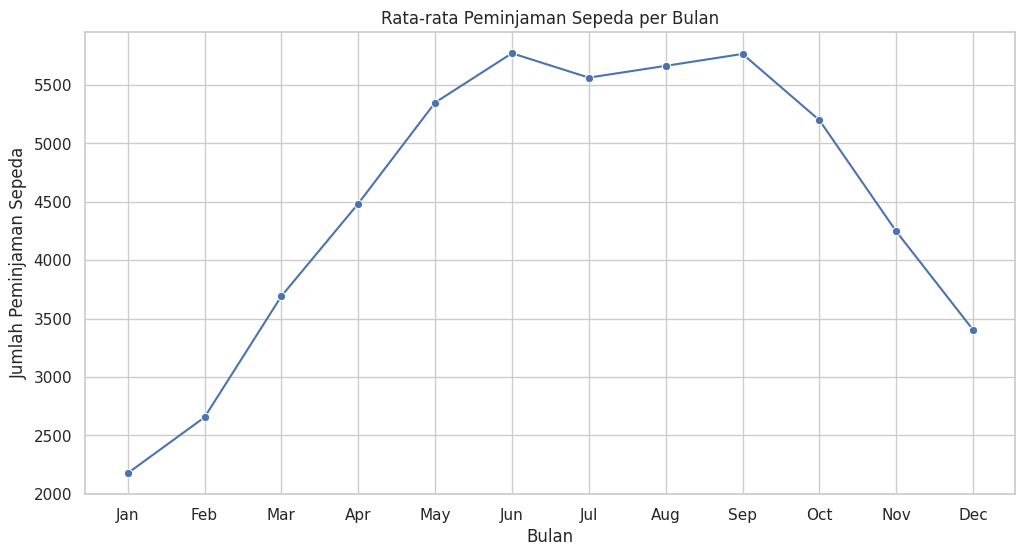

<ipython-input-27-510f1c70a015>:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='season', y='cnt', data=day_data, estimator='mean', ci=None)


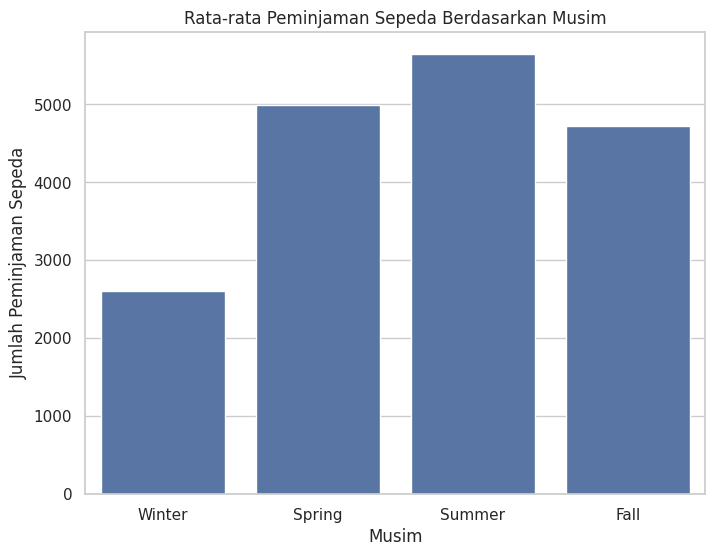

<ipython-input-27-510f1c70a015>:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='hr', y='cnt', data=hour_data, hue='season', ci=None, estimator='mean', marker='o')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple t

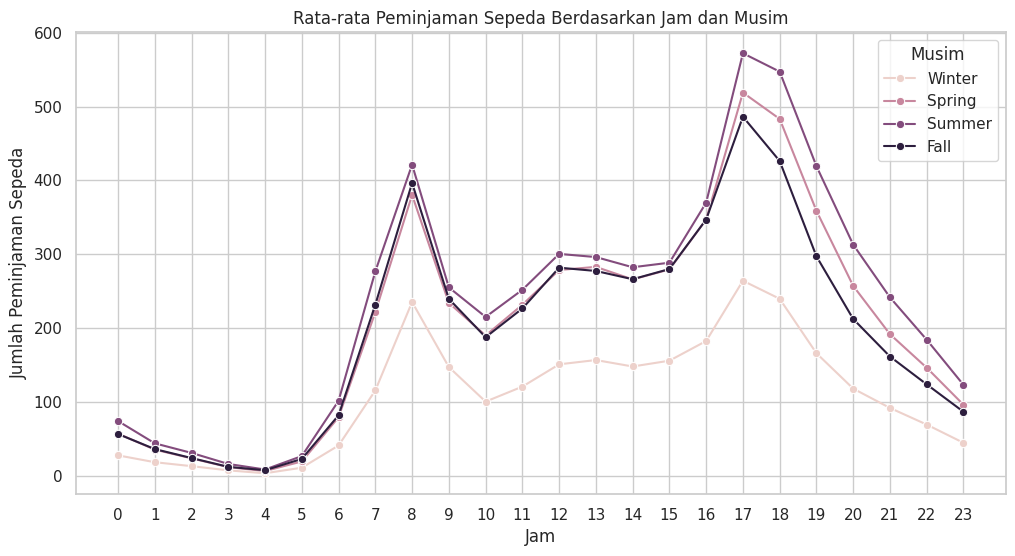

In [27]:
# Set style untuk visualisasi
sns.set(style="whitegrid")

# Grafik Garis - Tren peminjaman sepeda per bulan
plt.figure(figsize=(12, 6))
sns.lineplot(x='mnth', y='cnt', data=day_data, estimator='mean', ci=None, marker='o')
plt.title('Rata-rata Peminjaman Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

# Grafik Batang - Rata-rata peminjaman sepeda berdasarkan musim
plt.figure(figsize=(8, 6))
sns.barplot(x='season', y='cnt', data=day_data, estimator='mean', ci=None)
plt.title('Rata-rata Peminjaman Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Winter', 'Spring', 'Summer', 'Fall'])
plt.show()

# Grafik Garis - Rata-rata peminjaman sepeda berdasarkan jam dan musim
plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='cnt', data=hour_data, hue='season', ci=None, estimator='mean', marker='o')
plt.title('Rata-rata Peminjaman Sepeda Berdasarkan Jam dan Musim')
plt.xlabel('Jam')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.xticks(ticks=range(0, 24))
plt.legend(title='Musim', labels=['Winter', 'Spring', 'Summer', 'Fall'])
plt.grid(True)
plt.show()

##Pertanyaan 2

Apa pengaruh cuaca terhadap jumlah peminjaman sepeda?

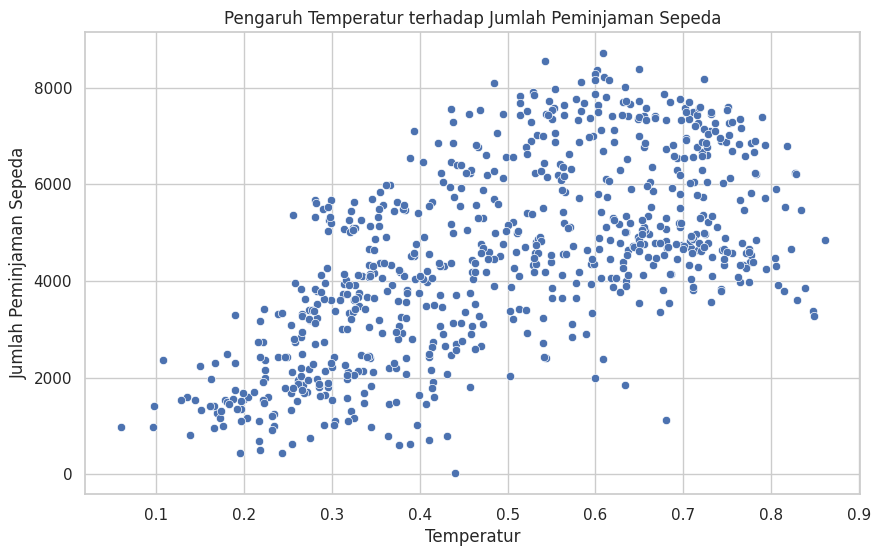

<ipython-input-28-afa01eae5176>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=day_data, estimator='mean', ci=None)


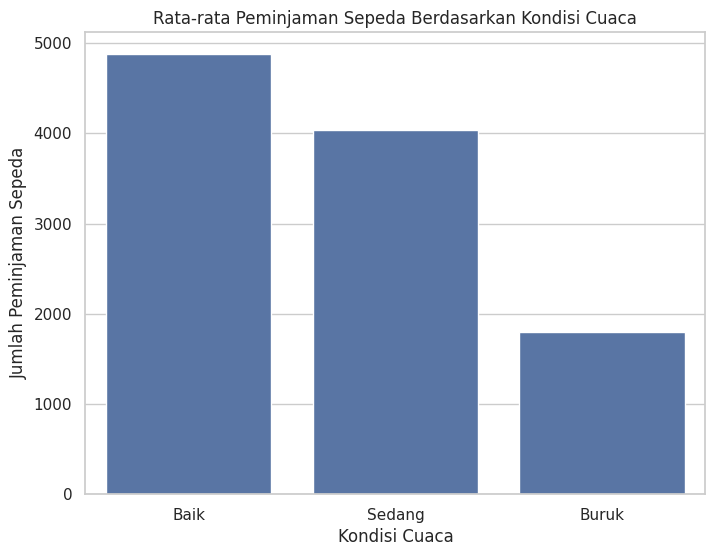

In [28]:
# Scatter Plot - Pengaruh temperatur terhadap jumlah peminjaman
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=day_data)
plt.title('Pengaruh Temperatur terhadap Jumlah Peminjaman Sepeda')
plt.xlabel('Temperatur')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.grid(True)
plt.show()

# Bar Plot - Rata-rata peminjaman sepeda berdasarkan kondisi cuaca
plt.figure(figsize=(8, 6))
sns.barplot(x='weathersit', y='cnt', data=day_data, estimator='mean', ci=None)
plt.title('Rata-rata Peminjaman Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.xticks(ticks=[0, 1, 2], labels=['Baik', 'Sedang', 'Buruk'])
plt.show()


#Conclusion

##Pertanyaan 1

Analisis data menunjukkan adanya tren yang cukup jelas sepanjang tahun dan musim. Pada musim semi dan musim panas, peminjaman sepeda meningkat secara signifikan dibandingkan dengan musim dingin, yang menunjukkan bahwa cuaca yang lebih hangat mendorong lebih banyak orang untuk menggunakan sepeda. Tren bulanan juga mengkonfirmasi bahwa selama bulan-bulan musim panas (Juni hingga September), rata-rata peminjaman lebih tinggi dibandingkan bulan-bulan musim dingin (Desember hingga Februari).

Tren jam harian juga menunjukkan pola yang menarik, di mana peminjaman cenderung meningkat selama jam sibuk (pagi dan sore hari), menunjukkan penggunaan sepeda untuk perjalanan ke/dari tempat kerja. Selain itu, peminjaman di hari kerja lebih tinggi dibandingkan hari libur, meskipun selisihnya tidak terlalu besar.

##Pertanyaan 2

EDA menunjukkan bahwa faktor cuaca memiliki pengaruh yang signifikan terhadap peminjaman sepeda. Kondisi cuaca yang baik (cerah) menghasilkan lebih banyak peminjaman sepeda, sedangkan kondisi cuaca buruk secara signifikan menurunkan jumlah peminjaman. Korelasi antara temperatur dan peminjaman sepeda cukup kuat, sementara kelembaban dan kecepatan angin juga memiliki pengaruh, meskipun lebih lemah. Secara keseluruhan, suhu yang lebih hangat dan cuaca yang baik mendorong lebih banyak penggunaan sepeda.